# Dataset base: 


In [4]:
import pandas as pd
import numpy as np
import random

np.random.seed(42)

productos = ['Audífono X', 'Teclado Y', 'Cámara Z', 'Laptop A', 'Mouse B']
categorias = ['Audífonos', 'Teclados', 'Cámaras', 'Laptops', 'Mouses']
regiones = ['Norte', 'Centro', 'Sur']
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
satisfaccion = ['Alta', 'Media', 'Baja']

# Generar  registros
data = []
for i in range(1, 201):
    prod_idx = random.randint(0, 4)
    precio = round(np.random.uniform(20, 1500), 2)
    unidades = np.random.randint(1, 20)
    publicidad = round(np.random.uniform(0, 10000), 2)
    fila = {
        'Id': i,
        'Producto': productos[prod_idx],
        'Categoría': categorias[prod_idx],
        'Precio': precio,
        'Unidades vendidas': unidades,
        'Mes': random.choice(meses),
        'Región': random.choice(regiones),
        'Publicidad': publicidad,
        'Satisfacción Cliente': random.choice(satisfaccion)
    }
    data.append(fila)

# Crear DataFrame
df = pd.DataFrame(data)

# Mostrar las primeras filas
print(df.head())

# Exportar 
df.to_csv('ventas.csv', index=False, encoding='utf-8')

   Id   Producto Categoría   Precio  Unidades vendidas      Mes  Región  \
0   1    Mouse B    Mouses   574.32                 15    Abril     Sur   
1   2  Teclado Y  Teclados   906.01                  7    Junio     Sur   
2   3   Cámara Z   Cámaras   167.96                 11  Febrero     Sur   
3   4    Mouse B    Mouses   909.65                  3    Marzo  Centro   
4   5    Mouse B    Mouses  1455.47                 12    Junio   Norte   

   Publicidad Satisfacción Cliente  
0     7319.94                Media  
1     4458.33                 Alta  
2     8661.76                 Alta  
3      205.84                Media  
4     9385.53                Media  


# Parte 1: Preparación de los datos
Este segmento realiza la carga de datos, la exploración inicial, el cálculo de nuevas métricas clave y la normalización de variables numéricas, según las instrucciones.

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Cargar el dataset 
df = pd.read_csv('ventas.csv')

df['IngresoTotal'] = df['Precio'] * df['Unidades vendidas']
df['Rentabilidad'] = df['IngresoTotal'] * 0.2


print("Resumen estadístico:")
print(df.describe())

# Precio, Publicidad, IngresoTotal
scaler = MinMaxScaler()
columnas_a_normalizar = ['Precio', 'Publicidad', 'IngresoTotal']
df_normalizado = df.copy()
df_normalizado[columnas_a_normalizar] = scaler.fit_transform(df[columnas_a_normalizar])

#Exportar 
df_normalizado.to_csv('ventas_procesadas.csv', index=False, encoding='utf-8')

Resumen estadístico:
               Id       Precio  Unidades vendidas   Publicidad  IngresoTotal  \
count  200.000000   200.000000         200.000000   200.000000     200.00000   
mean   100.500000   772.459450           9.785000  5030.634950    7345.48810   
std     57.879185   410.049055           5.788463  3133.308862    6373.49858   
min      1.000000    21.150000           1.000000   156.360000      21.15000   
25%     50.750000   457.117500           5.000000  2256.147500    2226.48500   
50%    100.500000   787.475000          10.000000  4864.440000    5197.30500   
75%    150.250000  1059.695000          15.000000  7969.167500   11096.81000   
max    200.000000  1496.660000          19.000000  9966.370000   27906.44000   

       Rentabilidad  
count    200.000000  
mean    1469.097620  
std     1274.699716  
min        4.230000  
25%      445.297000  
50%     1039.461000  
75%     2219.362000  
max     5581.288000  


# Parte 2: Modelos de aprendizaje supervisado (scikit-learn)
Este bloque importa las herramientas necesarias para construir y evaluar los modelos de Regresión y Clasificación.

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Cargar dataset
df = pd.read_csv('ventas_procesadas.csv')

# Modelo 1 – Regresión lineal
**Objetivo: Predecir las Unidades Vendidas en función del Precio y la Publicidad**


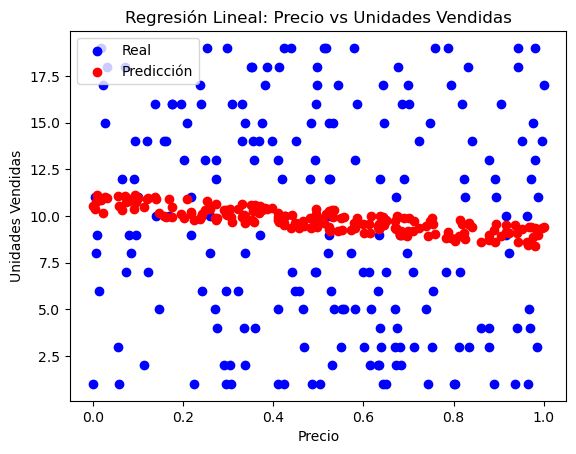

In [ ]:
X_reg = df[['Precio', 'Publicidad']]
y_reg = df['Unidades vendidas']

modelo_reg = LinearRegression()
modelo_reg.fit(X_reg, y_reg)
y_pred_reg = modelo_reg.predict(X_reg)

r2 = r2_score(y_reg, y_pred_reg)
mse = mean_squared_error(y_reg, y_pred_reg)

# Grafico
plt.scatter(df['Precio'], y_reg, color='blue', label='Real')
plt.scatter(df['Precio'], y_pred_reg, color='red', label='Predicción')
plt.xlabel('Precio')
plt.ylabel('Unidades Vendidas')
plt.title('Regresión Lineal: Precio vs Unidades Vendidas')
plt.legend()
plt.show()

# Modelo 2 – K-Vecinos más Cercanos (KNN)
**Objetivo: Clasificar el nivel de Satisfacción del Cliente (Alta/Media/Baja) según Precio y Publicidad.**

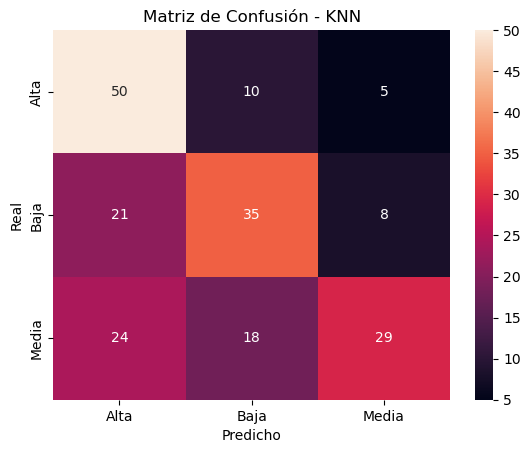

In [9]:
X_knn = df[['Precio', 'Publicidad']]
y_knn = df['Satisfacción Cliente']

y_knn_encoded = y_knn.astype('category').cat.codes
label_map = dict(enumerate(y_knn.astype('category').cat.categories))

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_knn, y_knn_encoded)
y_pred_knn = modelo_knn.predict(X_knn)

cm = confusion_matrix(y_knn_encoded, y_pred_knn)
acc_knn = accuracy_score(y_knn_encoded, y_pred_knn)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_map.values(), yticklabels=label_map.values())
plt.title('Matriz de Confusion - KNN')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Modelo 3 – Árbol de Decisión
**Objetivo: Predecir la Categoría del Producto según Precio, Publicidad y Unidades Vendidas.**

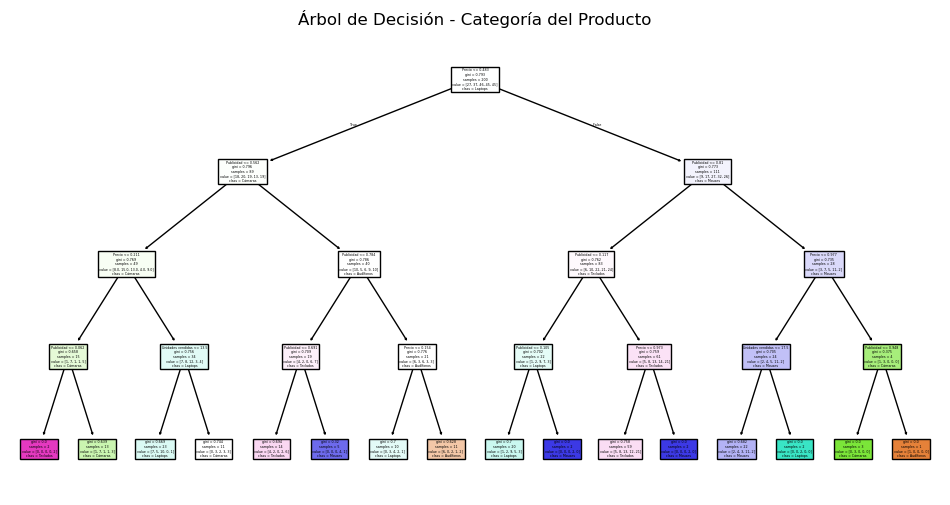

In [12]:
X_tree = df[['Precio', 'Publicidad', 'Unidades vendidas']]
y_tree = df['Categoría'].astype('category').cat.codes
label_map_tree = dict(enumerate(df['Categoría'].astype('category').cat.categories))

modelo_tree = DecisionTreeClassifier(max_depth=4)
modelo_tree.fit(X_tree, y_tree)

plt.figure(figsize=(12, 6))
plot_tree(modelo_tree, feature_names=X_tree.columns, class_names=list(label_map_tree.values()), filled=True)
plt.title('Árbol de Decisión - Categoría del Producto')
plt.show()

# Guarda los resultados (predicciones y métricas de cada modelo) en un nuevo CSV: 
**resultados_modelos.csv**
**Se consolidan las métricas de los tres modelos en un solo DataFrame y se exporta al CSV requerido para la integración con Power BI.**

In [ ]:
# Guardar DataFrame
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'KNN', 'Árbol de Decisión'],
    'Métrica': ['R2', 'Precisión', 'Precisión'],
    'Valor': [r2, acc_knn, modelo_tree.score(X_tree, y_tree)]
})

resultados.to_csv('resultados_modelos.csv', index=False, encoding='utf-8')

**Este bloque guarda la matriz de confusión y el árbol de decisión como imágenes, ya que Power BI a menudo requiere importar estas visualizaciones como archivos estáticos si no se pueden replicar en el software.**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_knn_encoded, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_map.values(),
            yticklabels=label_map.values())
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.tight_layout()
plt.savefig('matriz_confusion_knn.png')
plt.close()

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(modelo_tree,
          feature_names=X_tree.columns,
          class_names=list(label_map_tree.values()),
          filled=True)
plt.title('Árbol de Decisión - Categoría del Producto')
plt.tight_layout()
plt.savefig('arbol_decision.png')
plt.close()